# Redes Multicapa para Regresión

In [1]:
%load_ext autoreload
%autoreload 2

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from functions3 import *
import itertools
import sys

In [3]:
# import data from csv
data = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/Student_Performance_DEV.csv').drop(columns='idx')
data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,6.326605,6.560017,5.043475,4.958906,4,False
1,7.774666,6.459315,3.529156,9.601236,5,False
2,7.343601,6.487913,2.500939,6.390868,4,False
3,1.851852,10.126572,2.311390,4.000000,5,False
4,3.607081,8.093355,3.419712,4.857238,9,False
...,...,...,...,...,...,...
1395,5.010497,6.481511,2.531747,4.598361,3,False
1396,6.280722,6.056482,5.997887,4.408789,8,False
1397,5.492269,5.402522,5.867482,4.000000,5,False
1398,7.002018,6.425094,5.027055,5.284618,6,False


### a)
Implementar una red neuronal multicapa, que funcione para cualquier valor $L \ge 1$, y $M^{(l)} \ge 1$, así como el algoritmo de optimización de descenso por gradiente y backpropagation para optimizar los pesos de las unidades ocultas, asumiendo una “loss-function” que sea la suma de los errores cuadráticos.

In [60]:
# data = one_hot_encoding(data, 'extracurricular_activities')
data = data.astype({'extracurricular_activities': 'int'})

# add column with practice * prev_scores
data['practice_prev_scores'] = data['practice'] * data['prev_scores']

# add column with hs_study/hs_sleep
data['hs_study*hs_sleep'] = data['hs_study'] / data['hs_sleep']


X = data.drop(columns=['forecasted_performance'])
y = data['forecasted_performance'].values

train_data, test_data = train_test_split(data, test_size=0.2, seed=42)

X_train = train_data.drop(columns=['forecasted_performance'])
y_train = train_data['forecasted_performance'].values

X_test = test_data.drop(columns=['forecasted_performance'])
y_test = test_data['forecasted_performance'].values

X_train

,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities,practice_prev_scores,hs_study*hs_sleep
0,7.512345,5.072058,8.775325,14,1,122.854554,0.675163
1,7.645378,5.266626,8.351701,6,1,50.110206,0.688864
2,7.096499,3.071855,8.498025,2,1,16.996050,0.432869
3,6.454375,3.299192,9.913947,9,0,89.225524,0.511156
4,7.731830,2.091205,4.052463,17,0,68.891872,0.270467
...,...,...,...,...,...,...,...
1115,8.401831,5.314130,4.808138,16,0,76.930210,0.632497
1116,6.644282,4.947815,5.392057,2,0,10.784113,0.744673
1117,7.629650,4.989611,6.980204,9,0,62.821840,0.653976
1118,8.681235,5.776701,8.484583,9,0,76.361246,0.665424


In [5]:
nn_1 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 25, 1], activations='default', verbose=False)

# Fit the MLP model to the training data
train_losses_1, test_losses_1 = nn_1.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:12<00:00, 16.36it/s]


In [6]:
print(f"num layers: {nn_1.num_layers}")
print(f"layers: {nn_1.layers}")
print(f"activations: {nn_1.activations}")

num layers: 3
layers: [7, 25, 1]
activations: ['relu', 'relu', 'linear']


In [7]:
nn_2 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 5, 1], verbose=False)

nn_2.activations
# Fit the MLP model to the training data
train_losses_2, test_losses_2 = nn_2.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:16<00:00, 12.50it/s]


In [8]:
nn_3 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 7, 5, 1], verbose=False)

# Fit the MLP model to the training data
train_losses_3, test_losses_3 = nn_3.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:21<00:00,  9.29it/s]


In [9]:
nn_4 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 1, 1], verbose=False)

# Fit the MLP model to the training data
train_losses_4, test_losses_4 = nn_4.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

100%|██████████| 200/200 [00:11<00:00, 16.97it/s]


### b)
Implementar descenso por gradiente estocástico y graficar la evolución del error de entrenamiento en función de las  épocas.

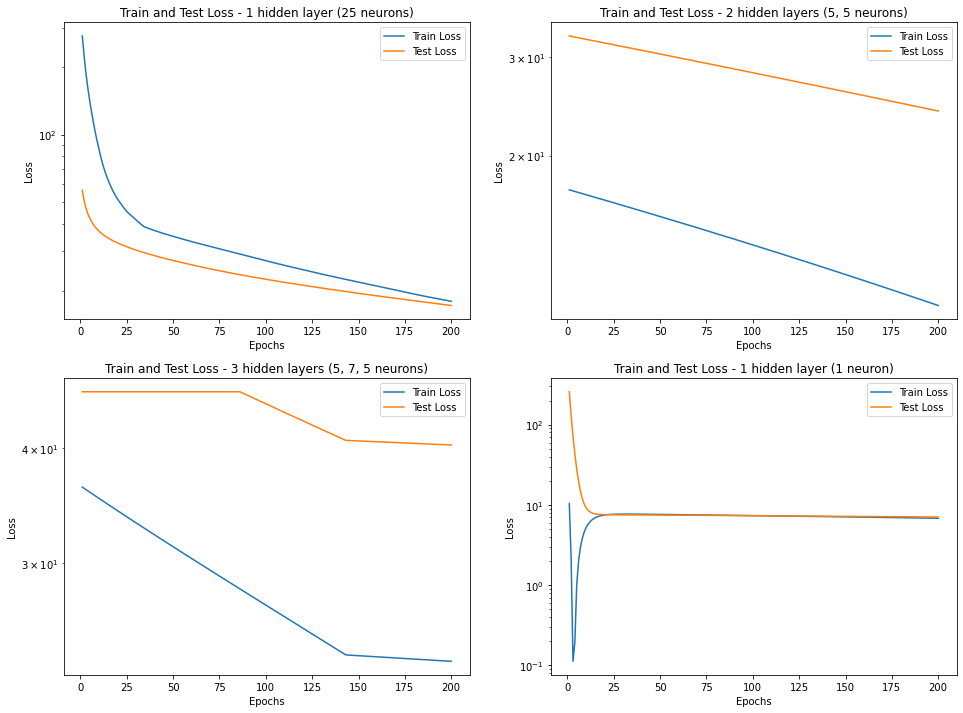

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(range(1, len(train_losses_1) + 1), train_losses_1, label='Train Loss')
axs[0, 0].plot(range(1, len(test_losses_1) + 1), test_losses_1, label='Test Loss')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Train and Test Loss - 1 hidden layer (25 neurons)')
axs[0, 0].legend()

axs[0, 1].plot(range(1, len(train_losses_2) + 1), train_losses_2, label='Train Loss')
axs[0, 1].plot(range(1, len(test_losses_2) + 1), test_losses_2, label='Test Loss')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Train and Test Loss - 2 hidden layers (5, 5 neurons)')
axs[0, 1].legend()

axs[1, 0].plot(range(1, len(train_losses_3) + 1), train_losses_3, label='Train Loss')
axs[1, 0].plot(range(1, len(test_losses_3) + 1), test_losses_3, label='Test Loss')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_title('Train and Test Loss - 3 hidden layers (5, 7, 5 neurons)')
axs[1, 0].legend()

axs[1, 1].plot(range(1, len(train_losses_4) + 1), train_losses_4, label='Train Loss')
axs[1, 1].plot(range(1, len(test_losses_4) + 1), test_losses_4, label='Test Loss')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_title('Train and Test Loss - 1 hidden layer (1 neuron)')
axs[1, 1].legend()

plt.show()

In [11]:
for i in range(1, 5):
    nn = eval(f'nn_{i}')
    predictions = nn.predict(X_test)
    print(f'nn_{i} Predictions:')
    print("  Predictions  |   Test")
    for i in range(len(predictions)):
        print(predictions[i], y_test[i])
    print('\n')
predictions = nn_1.predict(X_test)

nn_1 Predictions:
  Predictions  |   Test
[0.2798738] 9.678152468405315
[4.20500583] 7.337679311836268
[3.64692146] 4.542551445452206
[3.96062855] 4.408466887658554
[10.57986653] 6.5918391130432274
[7.50602513] 7.126303113365252
[0.] 5.824865318066567
[7.46876665] 4.318271770712224
[9.80283023] 2.6946935959490674
[13.43195151] 4.621360632505932
[14.28785515] 6.289601307408167
[5.95811807] 6.659869395546703
[16.69832668] 8.050121380949898
[4.04735711] 1.851851851851852
[12.10983046] 7.629186838253545
[2.74584093] 3.628587783482679
[3.43744866] 6.490047212114392
[3.3858135] 10.0
[6.34629625] 7.926128337307125
[9.27383649] 5.3777726427393455
[11.41621853] 7.71268659291545
[0.16836484] 1.851851851851852
[7.27945796] 6.9952581159936535
[5.37420111] 8.652310141516276
[10.17229495] 8.104721281886103
[3.67556528] 5.10361369184111
[9.10540084] 8.99645782049267
[0.] 6.235928190854355
[13.31750381] 5.7733074895165295
[16.79839443] 7.697125657561498
[3.03787937] 6.698293228713865
[4.25202352] 4.80

### c)
Implementar descenso por gradiente con mini-baches, y graficar la evolución del error de entrenamiento en función de las épocas, para distintos tamaños de baches. Deberáas elegir a tu criterio el tamaño de los mini-batches.

In [12]:
nn_c1 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 25, 1], verbose=False)
# Fit the MLP model to the training data
train_losses_c1, test_losses_c1 = nn_c1.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c2 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 5, 1], verbose=False)
# Fit the MLP model to the training data
train_losses_c2, test_losses_c2 = nn_c2.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c3 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 7, 5, 1],verbose=False)
# Fit the MLP model to the training data
train_losses_c3, test_losses_c3 = nn_c3.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c4 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 1, 1], verbose=False)
# Fit the MLP model to the training data
train_losses_c4, test_losses_c4 = nn_c4.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:10<00:00, 18.62it/s]


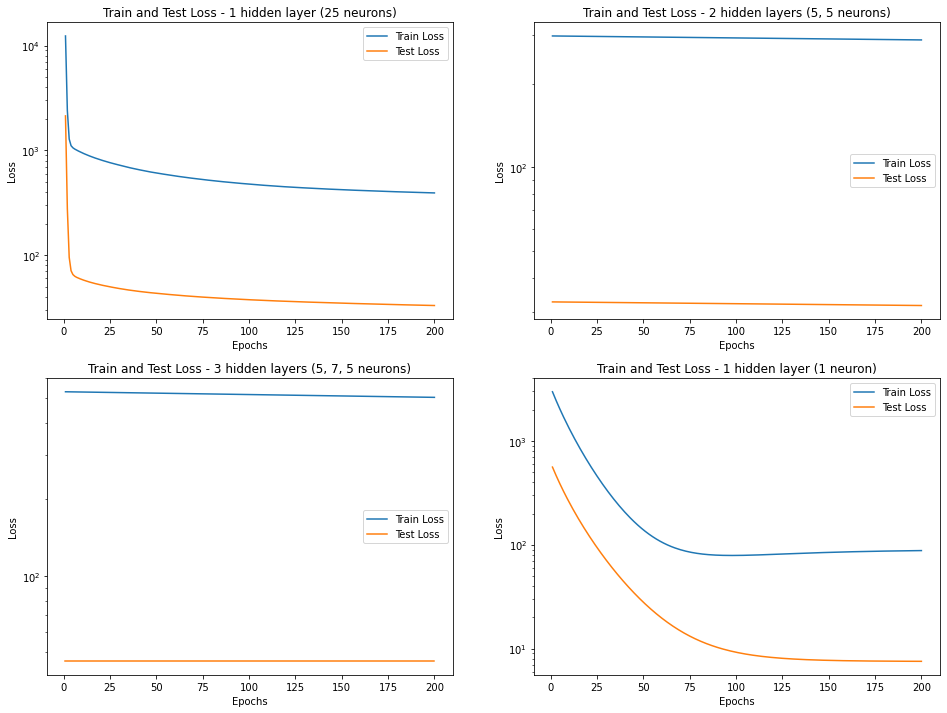

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(range(1, len(train_losses_c1) + 1), train_losses_c1, label='Train Loss')
axs[0, 0].plot(range(1, len(test_losses_c1) + 1), test_losses_c1, label='Test Loss')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Train and Test Loss - 1 hidden layer (25 neurons)')
axs[0, 0].legend()

axs[0, 1].plot(range(1, len(train_losses_c2) + 1), train_losses_c2, label='Train Loss')
axs[0, 1].plot(range(1, len(test_losses_c2) + 1), test_losses_c2, label='Test Loss')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Train and Test Loss - 2 hidden layers (5, 5 neurons)')
axs[0, 1].legend()

axs[1, 0].plot(range(1, len(train_losses_c3) + 1), train_losses_c3, label='Train Loss')
axs[1, 0].plot(range(1, len(test_losses_c3) + 1), test_losses_c3, label='Test Loss')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_title('Train and Test Loss - 3 hidden layers (5, 7, 5 neurons)')
axs[1, 0].legend()

axs[1, 1].plot(range(1, len(train_losses_c4) + 1), train_losses_c4, label='Train Loss')
axs[1, 1].plot(range(1, len(test_losses_c4) + 1), test_losses_c4, label='Test Loss')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_title('Train and Test Loss - 1 hidden layer (1 neuron)')
axs[1, 1].legend()

plt.show()

### d)
Utilizando el set de desarrollo y la metodología de cross-validation, seleccionar los hiperparámetros de la red. Para esto puede usar el algoritmo de gradiente descendiente que usted desee (normalmente, uno querrá usar el optimizador que mejor resultado le haya dado, en cuanto a performance del modelo entrenado y el tiempo de convergencia).

**Sugerencia:** si bien uno puede hacer una búsqueda exhaustiva sobre el espacio de hiperparámetros $L$ y $M^{(l)}$, esto puede resultar computacionalmente demasiado costoso, debido a que para cada combinación y cada fold, se de debe re-entrenar el modelo y evaluarlo. Piense si hay alguna manera de recorrer el espacio de búsqueda con menor costo computacional. Además, recuerde que dados dos modelos de performance similar, se privilegia elegir el de menor complejidad (menor cantidad de parámetros), porque tenderá a tener menor varianza en el error predictivo sobre data sets “nuevos” (es decir, que no hayan sido usados para el deasrrollo del modelo).


Va a tardar aprox 4hs en correr así como está

In [17]:
numbers = [5, 25, 50, 100]
lay_1 = [[X_train.shape[1], i, 1] for i in numbers]
lay_2 = [[X_train.shape[1], i//2, i//2, 1] for i in numbers]
lay_3 = [[X_train.shape[1], i//4, i//2, i//4, 1] for i in numbers]

# build table of hiperparameters to test
hiperparameters = {
    'layers': [*lay_1, *lay_2, *lay_3],
    'alpha': [1e-5, 1e-6, 1e-9],
    'mini_batch_size': [6, 20, 40]
}

# create a list of all possible combinations of hiperparameters
all_combinations = list(itertools.product(*hiperparameters.values()))
print(len(all_combinations))
all_combinations


# Define the number of folds for cross-validation
k_folds = 5

# Shuffle the dataset indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# Split the dataset into k folds
fold_size = len(indices) // k_folds
folds = [indices[i:i+fold_size] for i in range(0, len(indices), fold_size)]
best_hiperparameters = None
min_avg_test_loss = float('inf')  # Initialize with a large value

# Perform k-fold cross-validation
for combination in tqdm(all_combinations):
    # print(f"\nCombination: {combination}")
    # Unpack the hyperparameters
    layers, alpha, mini_batch_size = combination
    
    # Initialize lists to store evaluation results for each fold
    fold_train_losses = []
    fold_test_losses = []
    
    for fold_num, fold_indices in enumerate(folds):
        # print(f"Fold {fold_num + 1}:")

        # Extract train and test indices
        train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold_num])
        test_indices = fold_indices

        # Prepare train and test data
        X_train_fold = X.iloc[train_indices]
        y_train_fold = y[train_indices]
        X_test_fold = X.iloc[test_indices]
        y_test_fold = y[test_indices]

        # print(f"Train size: {X_train_fold.shape[1]}")
        # Train the model with the current hyperparameters
        nn = MLP(input_size=X_train_fold.shape[1], layers=layers) 
        # print(f"Layers: {nn.layers}, Alpha: {alpha}, Mini Batch Size: {mini_batch_size}, len: {len(nn.layers)} = num_layers: {nn.num_layers}, activations: {nn.activations}")
        train_losses, test_losses = nn.fit(list(zip(X_train_fold.values, y_train_fold)), 
                                            list(zip(X_test_fold.values, y_test_fold)),
                                            mini_batch_size, 
                                            max_epochs=200, 
                                            alpha=alpha)
        
        # Evaluate the model on the current fold
        train_loss = train_losses[-1]
        test_loss = test_losses[-1]
        
        # Store the evaluation results
        fold_train_losses.append(train_loss)
        fold_test_losses.append(test_loss)
        
        # Print the evaluation results for the current fold
        # print(f"Fold {fold_num+1} - Train Loss: {train_loss}, Test Loss: {test_loss}")
    
    # Compute the average evaluation results across all folds for the current hyperparameter combination
    avg_train_loss = np.mean(fold_train_losses)
    avg_test_loss = np.mean(fold_test_losses)

    # Update best hyperparameters if current combination has lower test loss
    if avg_test_loss < min_avg_test_loss:
        min_avg_test_loss = avg_test_loss
        best_hiperparameters = {'layers': layers, 'alpha': alpha, 'mini_batch_size': mini_batch_size}
    
    # Print the average evaluation results for the current hyperparameter combination
    # print(f"\nAvg Train Loss: {avg_train_loss}, Avg Test Loss: {avg_test_loss}")

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(best_hiperparameters)

108


 59%|█████▉    | 64/108 [1:10:45<59:56, 81.75s/it]/Users/maxi/Downloads/Actuales/ML/ML-TP2/Problema 3/functions3.py:163: RuntimeWarning: invalid value encountered in multiply
  d[l-1] = np.dot(self.weights[l].T, d[l]) * h_deriv(a[l-1])
/Users/maxi/Downloads/Actuales/ML/ML-TP2/Problema 3/functions3.py:101: RuntimeWarning: overflow encountered in square
  return np.mean((a_out - y) ** 2)
100%|██████████| 108/108 [2:21:53<00:00, 78.83s/it] 


Best Hyperparameters:
{'layers': [7, 25, 1], 'alpha': 1e-05, 'mini_batch_size': 6}


In [18]:
# train the optimum model, with the best hiperparamaters
nn_opt = MLP(input_size=X_train.shape[1], layers=best_hiperparameters['layers'])
train_losses_opt, test_losses_opt = nn_opt.fit(list(zip(X_train.values, y_train)), 
                                                list(zip(X_test.values, y_test)),
                                                best_hiperparameters['mini_batch_size'], 
                                                max_epochs=1000, 
                                                alpha=best_hiperparameters['alpha'])


100%|██████████| 1000/1000 [00:56<00:00, 17.79it/s]


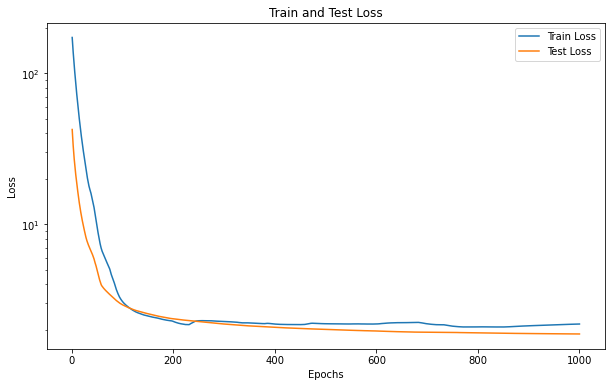

In [19]:
# Plot the train and test losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses_opt) + 1), train_losses_opt, label='Train Loss')
plt.plot(range(1, len(test_losses_opt) + 1), test_losses_opt, label='Test Loss')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

### e)
Analizar la performance de su modelo final en términos de $RMSE$, $MAE$ y $R^2$, y graficar $\hat{y}$ vs. $y$ sobre los datos “held out” de los folds de cross-validaion. Compare esto con la performance del modelo de regresión lineal desarrollado en el problema anterior. ¿Cuál de los dos modelos cree usted que generalizará mejor? ¿Por qué?


In [20]:
y_pred = nn_opt.predict(X_train)
y_pred_test = nn_opt.predict(X_test)

# RMSE
rmse_train_error = np.sqrt(np.mean((y_pred - y_train)**2))
print("RMSE(train) =", rmse_train_error)

rmse_test_error = np.sqrt(np.mean((y_pred_test - y_test)**2))
print("RMSE(test) =", rmse_test_error)

# MAE
mae_train_error = np.mean(np.abs(y_pred - y_train))
print("MAE(train) =", mae_train_error)
# on test set
mae_test_error = np.mean(np.abs(y_pred_test - y_test))
print("MAE(test) =", mae_test_error)

# R^2
r2_train = 1 - np.sum((y_train - y_pred)**2) / np.sum((y_train - np.mean(y_train))**2)
print("R^2(train) =", r2_train)
# on test set
r2_test = 1 - np.sum((y_test - y_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2)
print("R^2(test) =", r2_test)

RMSE(train) = 2.3300357479115834
RMSE(test) = 2.461728145412435
MAE(train) = 1.8728642888179163
MAE(test) = 1.9746548710542666
R^2(train) = -1720.6140560607014
R^2(test) = -424.3146643856988


In [89]:
best_hiperparameters = {'layers': [7, 25, 1], 'alpha': 1e-05, 'mini_batch_size': 6}

100%|██████████| 400/400 [00:22<00:00, 17.56it/s]


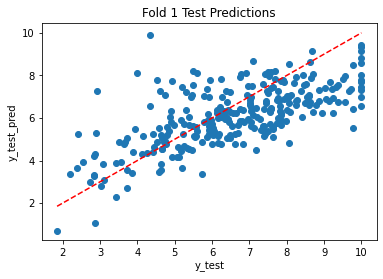

MSE for fold 1: 5.810598699795249


100%|██████████| 400/400 [00:23<00:00, 16.76it/s]


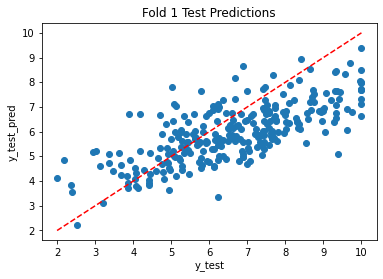

MSE for fold 2: 4.938136007796821


100%|██████████| 400/400 [00:22<00:00, 17.48it/s]


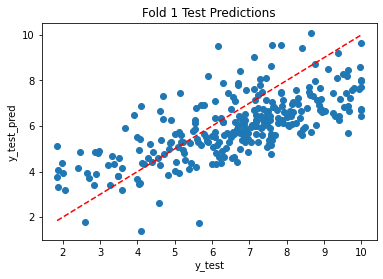

MSE for fold 3: 6.144320135012058


100%|██████████| 400/400 [00:22<00:00, 17.49it/s]


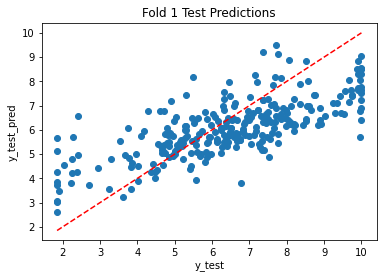

MSE for fold 4: 5.605468251266688


100%|██████████| 400/400 [00:23<00:00, 17.37it/s]


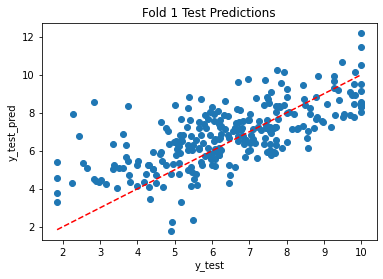

MSE for fold 5: 6.381720067854658


In [92]:
best_hiperparameters = {'layers': [7, 25, 1], 'alpha': 1e-05, 'mini_batch_size': 6}

k_folds = 5
indices = np.arange(len(X))
np.random.shuffle(indices)

# Split the dataset into k folds
fold_size = len(indices) // k_folds
folds = [indices[i:i+fold_size] for i in range(0, len(indices), fold_size)]
min_avg_test_loss = float('inf')  # Initialize with a large value


fold_train_losses = []
fold_test_losses = []

for fold_num, fold_indices in enumerate(folds):
    # print(f"Fold {fold_num + 1}:")

    # Extract train and test indices
    train_indices = np.concatenate([folds[i] for i in range(k_folds) if i != fold_num])
    test_indices = fold_indices

    # Prepare train and test data
    X_train_fold = X.iloc[train_indices]
    y_train_fold = y[train_indices]
    X_test_fold = X.iloc[test_indices]
    y_test_fold = y[test_indices]

    # print(f"Train size: {X_train_fold.shape[1]}")
    # Train the model with the current hyperparameters
    nn = MLP(input_size=X_train_fold.shape[1], layers=best_hiperparameters['layers']) 
    train_losses, test_losses = nn.fit(list(zip(X_train_fold.values, y_train_fold)), 
                                        list(zip(X_test_fold.values, y_test_fold)),
                                        best_hiperparameters['mini_batch_size'], 
                                        max_epochs=400, 
                                        alpha=best_hiperparameters['alpha'])
    
    y_test_pred_fold = nn.predict(X_test_fold)

    # Evaluate the model on the current fold
    train_loss = train_losses[-1]
    test_loss = test_losses[-1]
    mse = np.mean((y_test_fold - y_test_pred_fold)**2)
    
    # Store the evaluation results
    fold_train_losses.append(train_loss)
    fold_test_losses.append(test_loss)
    
    # Print the evaluation results for the current fold
    # print(f"Fold {fold_num+1} - Train Loss: {train_loss}, Test Loss: {test_loss}")

    plt.figure()
    plt.scatter(y_test_fold, y_test_pred_fold)
    plt.plot([y_test_fold.min(), y_test_fold.max()], [y_test_fold.min(), y_test_fold.max()], color='red', linestyle='--')
    plt.title(f'Fold {j+1} Test Predictions')
    plt.xlabel('y_test')
    plt.ylabel('y_test_pred')
    plt.show()

    print(f'MSE for fold {fold_num+1}: {mse}')
